# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque

from ddpg import DDPGAgent

from workspace_utils import active_session
import torch

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# for i in range(5):                                         # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
# create the agent
tennis_agent = DDPGAgent(state_size=state_size, action_size=action_size, seed=42)

In [8]:
def run_ddpg(n_episodes=2000, score_thres=0.5):
    """
    Runs Deep Q Learning.

    params:
        - n_episodes (int)    : max number of training episodes.
        - score_thres (float) : score required to solve the environment.
    """
    # list containing scores for each episode
    total_scores = []
    # last 100 scores
    scores_window = deque(maxlen=100)


    for i_episode in range(1, n_episodes+1):
        
        # setup lists for agents
        scores = np.zeros(num_agents)
        tennis_agent.reset()
        
        # reset environment 
        env_info = env.reset(train_mode=True)[brain_name]
        # get states for each agent
        states = env_info.vector_observations
        start = time.time()

        # utilize the agent
        while True:
            
            # get actions
            actions = tennis_agent.act(states)

            # take actions
            env_info = env.step(actions)[brain_name]

            # get observations for each agent
            next_states, rewards, dones, = env_info.vector_observations, env_info.rewards, env_info.local_done

            # update buffer and learn if necessary
            tennis_agent.step(states, actions, rewards, next_states, dones)

            # update state to new state
            states = next_states

            # increment reward
            scores += rewards

            # check if episode is done
            if np.any(dones):
                break
        
        #duration
        epoch_time = time.time() - start
        # get mean episode score
        ep_score = np.mean(scores)
        # save most recent mean score
        scores_window.append(ep_score)
        # save most recent mean score
        total_scores.append(ep_score)


        # print statements to keep track.
        print('\rEpisode {}\tAverage Score: {:.2f}\tTime taken: {}s'.format(i_episode, np.mean(scores_window), int(epoch_time)), end="")
        if i_episode % 100 == 0:
            print("\rEpisode {}\tAverage Score: {:.2f}\tTime taken: {}s".format(i_episode, np.mean(scores_window), int(epoch_time)))
        
        # check if environment is solved
        if np.mean(scores_window) >= score_thres:
            print("\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}".format(i_episode, np.mean(scores_window)))
            # save models for actor and critic
            torch.save(tennis_agent.actor_net.state_dict(), "actor_net.pth")
            torch.save(tennis_agent.critic_net.state_dict(), "critic_net.pth")
            break

    return total_scores

In [9]:
# train
with active_session():
    scores = run_ddpg()

Episode 5	Average Score: -0.00	Time taken: 0s

/home/workspace/ddpg.py:117: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_net.parameters(), 1.0)


Episode 100	Average Score: -0.00	Time taken: 0s
Episode 200	Average Score: -0.00	Time taken: 0s
Episode 300	Average Score: 0.01	Time taken: 0ss
Episode 400	Average Score: 0.01	Time taken: 0s
Episode 500	Average Score: 0.01	Time taken: 0s
Episode 600	Average Score: 0.02	Time taken: 0s
Episode 700	Average Score: 0.02	Time taken: 0s
Episode 800	Average Score: 0.01	Time taken: 0s
Episode 900	Average Score: 0.06	Time taken: 0s
Episode 1000	Average Score: 0.06	Time taken: 0s
Episode 1100	Average Score: 0.09	Time taken: 0s
Episode 1170	Average Score: 0.50	Time taken: 9s
Environment solved in 1170 episodes!	Average Score: 0.50


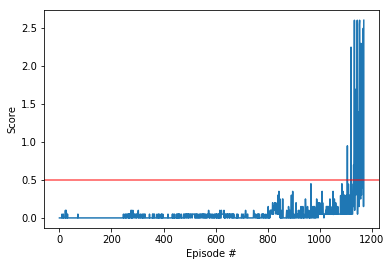

In [26]:
# plot scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel("Score")
plt.xlabel("Episode #")
ax.axhline(0.5, c="red", linewidth=2, alpha=0.5)
plt.show()